# CNN Applications

#### Packages

In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

## Mood Classifier

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


#### Sample Training Image

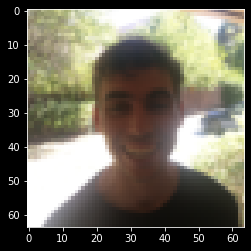

In [3]:
index = 160
plt.style.use(['dark_background'])
plt.imshow(X_train_orig[index]) 
plt.show()

#### Build Model

In [4]:
def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            tfl.ZeroPadding2D(padding=(3, 3), input_shape=(64, 64, 3)),
            ## Conv2D with 32 7x7 filters and stride of 1
            tfl.Conv2D(32, (7,7)),
            ## BatchNormalization for axis 3
            tfl.BatchNormalization(axis=3),
            ## ReLU
            tfl.ReLU(),
            ## Max Pooling 2D with default parameters
            tfl.MaxPool2D(),
            ## Flatten layer
            tfl.Flatten(),
            ## Dense layer with 1 unit for output & 'sigmoid' activation
            tfl.Dense(1, activation='sigmoid')])
    
    return model

#### Compile

In [5]:
happy_model = happyModel()
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

#### Model Overview

In [6]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

#### Training

In [7]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 3s 59ms/step - loss: 1.1995 - accuracy: 0.7033
Epoch 2/10
38/38 [==============================] - 2s 60ms/step - loss: 0.2351 - accuracy: 0.9033
Epoch 3/10
38/38 [==============================] - 2s 61ms/step - loss: 0.1666 - accuracy: 0.9417
Epoch 4/10
38/38 [==============================] - 2s 63ms/step - loss: 0.1446 - accuracy: 0.9383
Epoch 5/10
38/38 [==============================] - 2s 59ms/step - loss: 0.0921 - accuracy: 0.9700
Epoch 6/10
38/38 [==============================] - 2s 58ms/step - loss: 0.1156 - accuracy: 0.9600
Epoch 7/10
38/38 [==============================] - 2s 57ms/step - loss: 0.1636 - accuracy: 0.9333
Epoch 8/10
38/38 [==============================] - 2s 58ms/step - loss: 0.2569 - accuracy: 0.9217
Epoch 9/10
38/38 [==============================] - 2s 61ms/step - loss: 0.1217 - accuracy: 0.9633
Epoch 10/10
38/38 [==============================] - 2s 63ms/step - loss: 0.0806 - accuracy: 0.9733


#### Evaluation

In [8]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 25ms/step - loss: 0.1420 - accuracy: 0.9400


[0.14195898175239563, 0.9399999976158142]

[[0.9363431 ]
 [0.17338014]]


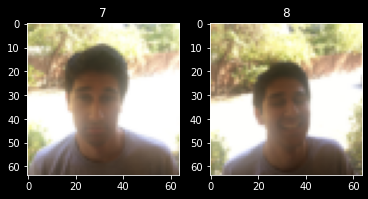

In [9]:
pred = happy_model.predict(X_test[6:8])
print(pred)

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('7')
axarr[0].imshow(X_test_orig[7]) 
axarr[1].set_title('8')
axarr[1].imshow(X_test_orig[8]) 

## Hand-Digit Multiclassifier

In [10]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


#### Sample Training Image

y = 4


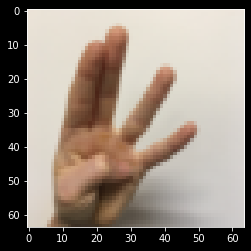

In [11]:
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

#### Build Model

In [12]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)

    Z1 = tfl.Conv2D(8, 4, activation='linear', padding="same", strides=1)(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(pool_size=(8, 8), strides=(8, 8), padding='same')(A1)
    Z2 = tfl.Conv2D(16, 2, activation='linear', padding="same", strides=1)(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(pool_size=(4, 4), strides=(4, 4), padding='same')(A2)
    F = tfl.Flatten()(P2)
    outputs = tfl.Dense(6, activation='softmax')(F)
    
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

#### Model Overview

In [13]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 8)         392       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          528       
_________________________________________________________________
re_lu_2 (ReLU)               (None, 8, 8, 16)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 16)          0     

#### Training

In [14]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 1s 54ms/step - loss: 1.8008 - accuracy: 0.1491 - val_loss: 1.7933 - val_accuracy: 0.1750
Epoch 2/100
17/17 [==============================] - 1s 47ms/step - loss: 1.7896 - accuracy: 0.2120 - val_loss: 1.7888 - val_accuracy: 0.1833
Epoch 3/100
17/17 [==============================] - 1s 47ms/step - loss: 1.7826 - accuracy: 0.2935 - val_loss: 1.7836 - val_accuracy: 0.2583
Epoch 4/100
17/17 [==============================] - 1s 47ms/step - loss: 1.7746 - accuracy: 0.3167 - val_loss: 1.7773 - val_accuracy: 0.2917
Epoch 5/100
17/17 [==============================] - 1s 47ms/step - loss: 1.7658 - accuracy: 0.3315 - val_loss: 1.7695 - val_accuracy: 0.3000
Epoch 6/100
17/17 [==============================] - 1s 47ms/step - loss: 1.7548 - accuracy: 0.3704 - val_loss: 1.7604 - val_accuracy: 0.3083
Epoch 7/100
17/17 [==============================] - 1s 47ms/step - loss: 1.7400 - accuracy: 0.4037 - val_loss: 1.7457 - val_accuracy: 0.3750
Epoch 

17/17 [==============================] - 1s 47ms/step - loss: 0.6380 - accuracy: 0.7972 - val_loss: 0.7122 - val_accuracy: 0.7167
Epoch 59/100
17/17 [==============================] - 1s 46ms/step - loss: 0.6305 - accuracy: 0.8009 - val_loss: 0.7050 - val_accuracy: 0.7167
Epoch 60/100
17/17 [==============================] - 1s 47ms/step - loss: 0.6231 - accuracy: 0.8019 - val_loss: 0.6994 - val_accuracy: 0.7167
Epoch 61/100
17/17 [==============================] - 1s 48ms/step - loss: 0.6164 - accuracy: 0.8065 - val_loss: 0.6930 - val_accuracy: 0.7250
Epoch 62/100
17/17 [==============================] - 1s 50ms/step - loss: 0.6090 - accuracy: 0.8056 - val_loss: 0.6879 - val_accuracy: 0.7250
Epoch 63/100
17/17 [==============================] - 1s 53ms/step - loss: 0.6029 - accuracy: 0.8074 - val_loss: 0.6822 - val_accuracy: 0.7417
Epoch 64/100
17/17 [==============================] - 1s 51ms/step - loss: 0.5960 - accuracy: 0.8111 - val_loss: 0.6777 - val_accuracy: 0.7417
Epoch 65/100

#### Evaluations

C:\Users\zakki\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

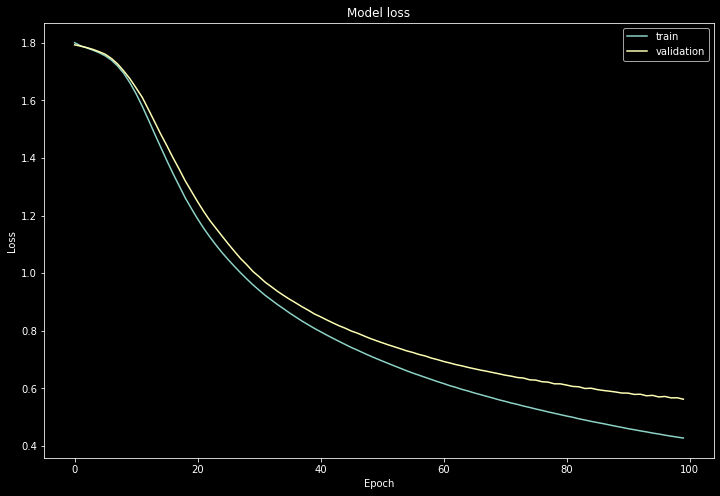

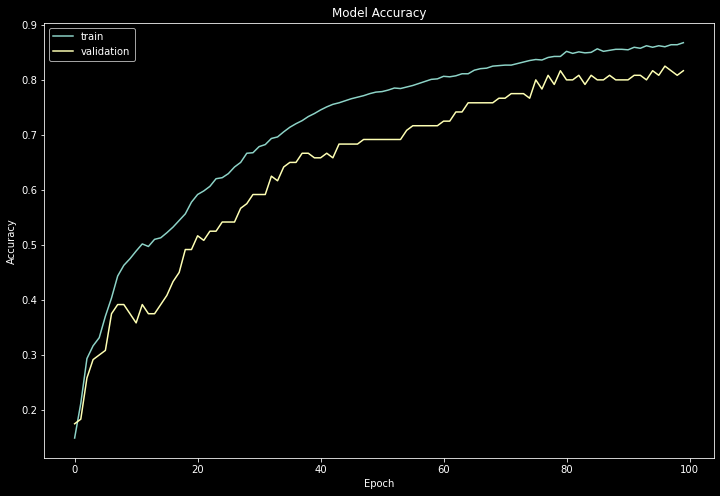

In [15]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')